## Alunos: Samuel Lipovetsky, Alexis Mariz, Leandro Diniz.
# Introdução  

Nesta seção, vamos fornecer uma explicação detalhada do problema de negócio sendo resolvido com os dados fornecidos. O foco é entender o propósito do dataset, sua origem e o valor que ele pode agregar na solução de problemas.  

## Objetivo do Dataset  
O propósito deste dataset é verificar se é possível classificar os acidentes em relação à sua fatalidade. Ou seja, utilizando todas as outras informações disponíveis, buscamos gerar um modelo que seja capaz de classificar os acidentes como fatais ou não fatais com alta precisão e acurácia.  

## Origem dos Dados  
O dataset tem origem nos registros públicos disponibilizados pela prefeitura de Belo Horizonte, que incluem dados detalhados sobre acidentes de trânsito ao longo de vários anos. Esses registros abrangem informações importantes, como horário, local, pessoas envolvidas e tipos de veículos, que podem auxiliar na construção de modelos preditivos.  

## Características do Dataset  
O dataset é composto por quatro seções principais, descritas abaixo:  

- **Acidentes**: Contém dados como o tipo de acidente, horário, condições climáticas e tipo de socorro prestado.  
- **Veículos**: Inclui detalhes sobre o tipo e a situação do veículo (em movimento, estacionado, etc.) e se o veículo era de uso particular ou oficial.  
- **Pessoas Envolvidas**: Registra informações como idade, gênero, gravidade dos ferimentos e o papel no acidente (condutor, passageiro, pedestre).  
- **Localização**: Descreve as ruas e bairros onde os acidentes ocorreram.  

Cada linha representa uma pessoa envolvida em um acidente e inclui todas as informações associadas ao acidente e ao indivíduo.  

## Contextualização do Problema  
Classificar a fatalidade dos acidentes é uma tarefa de grande relevância para a segurança pública. Ao compreender os fatores que contribuem para a gravidade de um acidente, é possível:  
- **Apoiar Decisões Estratégicas**: As autoridades podem utilizar os resultados para priorizar intervenções em áreas de maior risco.  
- **Planejamento Urbano e Viário**: As informações podem ser usadas para melhorar a infraestrutura de trânsito e prevenir acidentes graves.  
- **Otimização de Recursos**: Direcionar recursos de emergência de forma mais eficiente, baseando-se em padrões identificados pelo modelo.  

## Metodologia Proposta  
Como este dataset possui informações detalhadas sobre os acidentes que aconteceram em Belo Horizonte, os dados serão divididos em treino e teste. Dessa forma, será possível:  
1. **Treinar um modelo de classificação** para prever a fatalidade dos acidentes com base nas variáveis disponíveis.  
2. **Avaliar o desempenho do modelo** gerando métricas como precisão, acurácia e F1-score.  
3. **Interpretar os resultados** para identificar os fatores mais relevantes que contribuem para a gravidade dos acidentes.  



## 2. Compreensão e Preparação dos Dados

### Compreensão dos Dados

Nesta fase, exploramos o dataset em detalhes, focando em entender sua estrutura e características. A maior parte dos dados é categórica, com exceção de variáveis como a idade da pessoa envolvida e a hora do acidente. Observou-se uma quantidade significativa de valores ausentes em atributos importantes, como “embriaguez” e “uso do cinto de segurança”. Esses campos foram desconsiderados para análise posterior.

A análise inicial incluiu uma investigação sobre a distribuição dos valores e estatísticas descritivas, além da identificação de valores nulos e duplicados.

### Preparação dos Dados

1. **Limpeza de Dados**: Removemos dados nulos e registros duplicados, além de excluirmos colunas irrelevantes para o processo de mineração, listadas em `columns_to_be_dropped`. Esse passo foi essencial para reduzir a dimensionalidade do dataset e remover informações redundantes.




In [1]:
import pandas as pd
import os
#loading and joining the tables based on the first colum "numero_boletim" or"num_boletim"
def load_and_concatenate_csvs(directory_path, delimiter=';'):
    csv_files = [file for file in os.listdir(directory_path) if file.endswith('.csv')]
    dataframes = []
    for file in csv_files:
        file_path = os.path.join(directory_path, file)
        try:
            df = pd.read_csv(file_path, encoding='utf-8', delimiter=delimiter, on_bad_lines='skip')
        except UnicodeDecodeError:
            df = pd.read_csv(file_path, encoding='latin1', delimiter=delimiter, on_bad_lines='skip')
        dataframes.append(df)
    return pd.concat(dataframes, ignore_index=True)


si_bol_path = './si-bol'
si_env_path = './si-env'
si_veic_path = './si-veic'
si_log_path = './si-log'
pd.options.display.max_columns = None

df_si_bol = load_and_concatenate_csvs(si_bol_path)
df_si_env = load_and_concatenate_csvs(si_env_path)
df_si_veic = load_and_concatenate_csvs(si_veic_path)
df_si_log = load_and_concatenate_csvs(si_log_path)



print("si-bol DataFrame shape:", df_si_bol.shape)
print("si-env DataFrame shape:", df_si_env.shape)
print("si-veic DataFrame shape:", df_si_veic.shape)
print("si-log DataFrame shape:", df_si_log.shape)


df_si_env.rename(columns={'num_boletim': 'numero_boletim'}, inplace=True)

joined_df = df_si_bol.merge(df_si_env, on="numero_boletim", how="outer")
joined_df = joined_df.merge(df_si_veic, on="numero_boletim", how="outer" )
joined_df = joined_df.merge(df_si_log, on="numero_boletim", how="outer")

joined_df.drop_duplicates().dropna().head()



si-bol DataFrame shape: (44371, 23)
si-env DataFrame shape: (99485, 16)
si-veic DataFrame shape: (78867, 11)
si-log DataFrame shape: (59955, 16)


,numero_boletim,data hora_boletim,data_inclusao,tipo_acidente,desc_tipo_acidente,cod_tempo,desc_tempo,cod_pavimento,pavimento,cod_regional,desc_regional,origem_boletim,local_sinalizado,velocidade_permitida,coordenada_x,coordenada_y,hora_informada,indicador_fatalidade,valor_ups,descricao_ups,data_alteracao_smsa,valor_ups_antiga,descricao_ups_antiga,data_hora_boletim_x,numero_envolvido,condutor,codigo_severidade,desc_severidade,sexo,cinto_seguranca,Embreagues,Idade,nascimento,categoria_habilitacao,descricao_habilitacao,declaracao_obito,cod_severidade_antiga,especie_veiculo,data_hora_boletim_y,sequencial_veiculo,codigo_categoria,descricao_categoria,codigo_especie,descricao_especie,codigo_situacao,descricao_situacao,tipo_socorro,descricao_tipo_socorro,data_boletim,numero_municipio,nome_municipio,sequencia_logradouros,numero_logradouro,tipo_logradouro,nome_logradouro,tipo_logradouro_anterior,nome_logradoro_anterior,Numero_bairro,nome_bairro,tipo_bairro,descricao_tipo_bairro,numero_imovel,numero_imovel_proximo
0,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
1,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,1,SIM,3,SEM FERIMENTOS,M,NÃO INFORMADO,NÃO INFORMADO,55,19/10/1957,N,NAO INFORMADO ...,0,0,AUTOMOVEL,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
2,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
3,318,01/01/2013 01:16,02/01/2013 00:00,H01002,ABALROAMENTO COM VITIMA ...,1,BOM,1,ASFALTO,25,PAMPULHA,PMMG,NÃO INFORMADO,0,60876520.0,80707082.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 01:16,2,SIM,1,NAO FATAL,M,NÃO INFORMADO,NÃO INFORMADO,18,14/06/1994,N,NAO INFORMADO ...,0,0,MOTOCICLETA,01/01/2013 01:16,2.0,3.0,PARTICULAR,4.0,MOTOCICLETA,1.0,EM MOVIMENTO,2.0,VIATURA PMMG,01/01/2013 01:16,1.0,BELO HORIZONTE,1.0,48337.0,AVE,DOM PEDRO I ...,NI,NÃO INFORMADO ...,699.0,ITAPOA ...,B,BAIRRO,1800,0.0
4,665,01/01/2013 02:12,20/08/2013 00:00,H06002,ATROPELAMENTO DE PESSOA SEM VITIMA FATAL ...,0,NAO INFORMADO,0,NAO INFORMADO,21,NORDESTE,PMMG,NÃO INFORMADO,0,61218262.0,80178625.0,SIM,NÃO,5,ACIDENTE COM VÍTIMA NÃO FATAL,00/00/0000,0,NÃO INFORMADO,01/01/2013 02:12,1,SIM,3,SEM FERIMENTOS,F,NÃO INFORMADO,NÃO INFORMADO,27,11/03/1985,B,"VEICULOS MOTOR. COM ATE 8 PASSAGEIROS, PESO MA...",0,0,AUTOMOVEL,01/01/2013 02:12,1.0,3.0,PARTICULAR,6.0,AUTOMOVEL,1.0,EM MOVIMENTO,3.0,AMBULANCIA,01/01/2013 02:12,1.0,BELO HORIZONTE,1.0,18652.0,AVE,CRISTIANO MACHADO ...,NI,NÃO INFORMADO ...,698.0,IPIRANGA ...,B,BAIRRO,3435,0.0


In [2]:


columns_to_be_dropped=["data_inclusao","desc_tipo_acidente",
                       "cod_tempo","pavimento","desc_regional",
                       "velocidade_permitida","origem_boletim",
                       "cod_pavimento","local_sinalizado",
                       "data_alteracao","valor_ups_antiga","cod_severidade_antiga",
                        "valor_ups","descricao_ups","data_alteracao_smsa","descricao_ups_antiga"
                        "desc_severidade","descricao_habilitacao","codigo_situacao",
                        "cod_tipo_socoro", "data_hora_boletim","nome_municipio",
                        "numero_imovel_proximo","numero_imovel","descricao_tipo_bairro",
                        "tipo_bairro","Numero_bairro","sequencia_logradouros","numero_logradouro",
                        "nome_logradouro","tipo_logradouo_anterior","nome_logradoro_anterior"
                        "cod_tipo_socorro","coordenada_x","coordenada_y","descrição_categoria",
                        "cod_especie","tipo_logradouro_anterior"
                        "descricao_ups_antiga","hora_informada","nascimento",
                        "descricao_categoria","numero_municipio","nome_logradoro_anterior","data_boletim",
                        "data_hora_boletim_y","data_hora_boletim_x","descricao_ups_antiga","cod_regional",
                        "tipo_logradouro_anterior","codigo_especie","codigo_categoria","tipo_socorro",
                        "codigo_severidade","declaracao_obito","sequencial_veiculo","numero_envolvido",
                        "desc_tempo","Embreagues","cinto_seguranca","indicador_fatalidade","especie_veiculo"
                       ]
full_df = joined_df
joined_df = joined_df.drop(columns=columns_to_be_dropped, errors='ignore')

joined_df =joined_df.drop_duplicates()
display(joined_df.head())

,numero_boletim,data hora_boletim,tipo_acidente,condutor,desc_severidade,sexo,Idade,categoria_habilitacao,descricao_especie,descricao_situacao,descricao_tipo_socorro,tipo_logradouro,nome_bairro
0,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
1,318,01/01/2013 01:16,H01002,SIM,SEM FERIMENTOS,M,55,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
2,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,AUTOMOVEL,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
3,318,01/01/2013 01:16,H01002,SIM,NAO FATAL,M,18,N,MOTOCICLETA,EM MOVIMENTO,VIATURA PMMG,AVE,ITAPOA ...
4,665,01/01/2013 02:12,H06002,SIM,SEM FERIMENTOS,F,27,B,AUTOMOVEL,EM MOVIMENTO,AMBULANCIA,AVE,IPIRANGA ...


## Explorando visualmente os dados

Para entender melhor visualmente como os dados se relacionam foram feitos alguns gráficos para auxiliar esse processo.

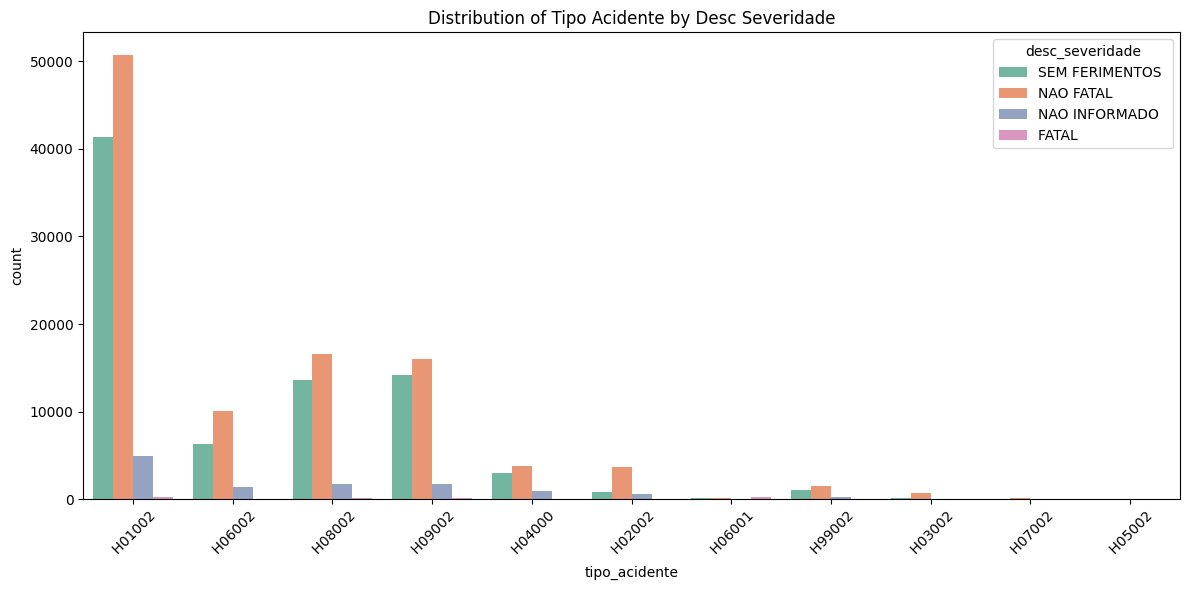

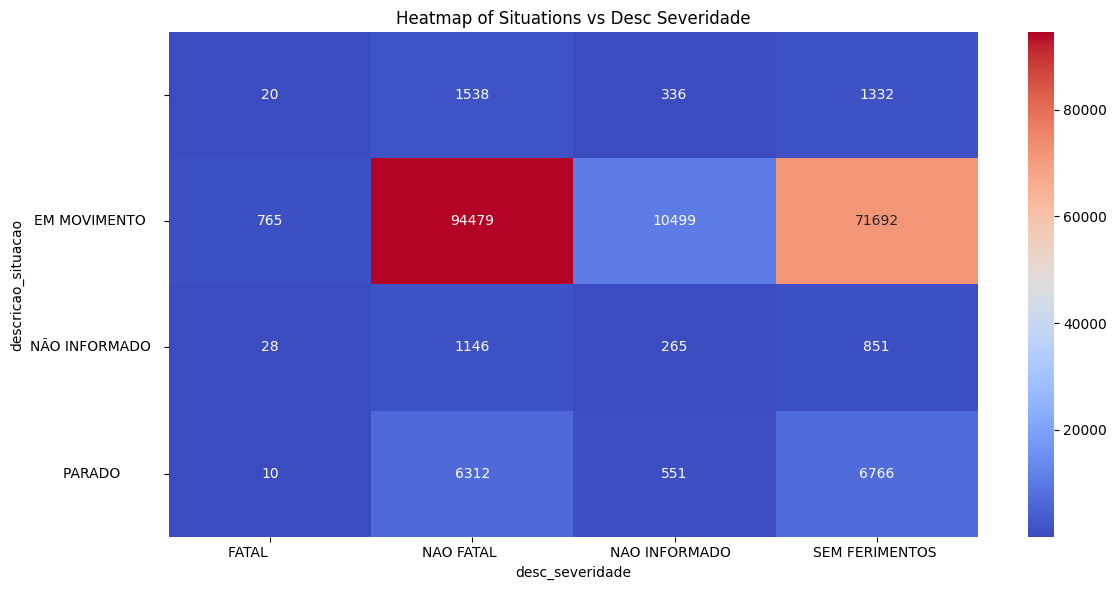

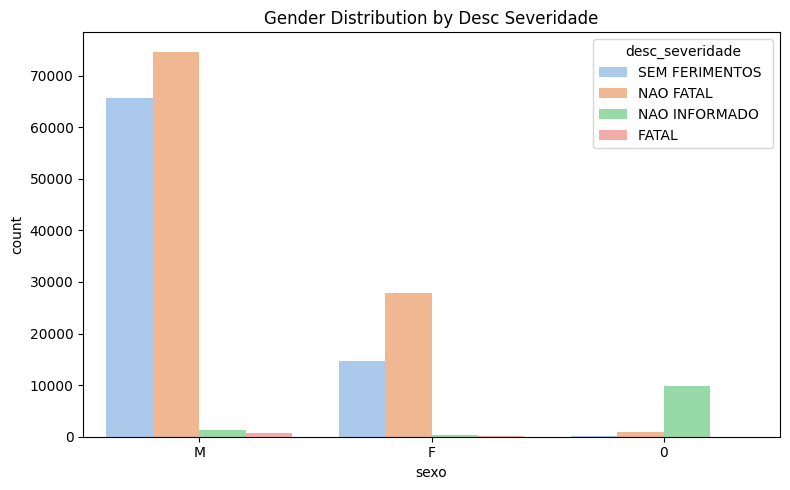

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df =  joined_df
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='tipo_acidente', hue='desc_severidade', palette='Set2')
plt.title('Distribution of Tipo Acidente by Desc Severidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# 3. Heatmap: Cross-tabulation between 'descricao_situacao' and 'desc_severidade'
crosstab = pd.crosstab(df['descricao_situacao'], df['desc_severidade'])
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='d', cmap='coolwarm')
plt.title('Heatmap of Situations vs Desc Severidade')
plt.tight_layout()
plt.show()

# 4. Count Plot: Distribution of 'sexo' by 'desc_severidade'
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sexo', hue='desc_severidade', palette='pastel')
plt.title('Gender Distribution by Desc Severidade')
plt.tight_layout()
plt.show()

## Análise dos gráficos
É possivel observa que a a maior parte dos acidentes é do tipo H0102, que descreve acidentes do tipo "abalroamento". Ainda é possível observar que existem pouqissimos acidentes fatais quando comparados com os acidentes sem ferimentos e não fatais.

## 3. Modelagem

### 1. Objetivo

O objetivo da modelagem é gerar um modelo de classificação que seja capaz de classificar com alta acurácia e precisão os acidentes em relação à sua severidade, utilizando os outros dados disponíveis.

### 2. Implementação dos Algoritmos

Serão testados inicialmente o algoritmo **RandomForest** para classificar os acidentes tanto em relação à fatalidade quanto à gravidade dos ferimentos. Como os dados são muito desbalanceados em relação à fatalidade (menos de 0,4% dos acidentes são fatais), os resultados para a classificação de fatalidade podem ser delicados. Portanto, será feita também a classificação em relação à gravidade dos ferimentos em categorias como **não fatais** e **sem ferimentos**, que são mais bem balanceados.

### 3. Pré-processamento dos Dados

#### 3.1. Binning da Hora do Dia

A coluna **data hora_boletim** foi convertida para o formato de data e hora e então foi extraída a hora do dia. Com base na hora, foi feito um binning dividindo as horas em três categorias: manhã, tarde e noite.

#### 3.2. Binning da Idade

A variável **Idade** foi dividida em faixas etárias: crianças (0-15 anos), jovens adultos (17-29 anos), meia-idade (31-44 anos) e idosos (45 anos ou mais). Essas faixas foram criadas como variáveis binárias, onde cada faixa etária foi representada como uma coluna booleana (True/False).

#### 3.3. Agrupamento de Tipos de Veículos

A variável **descricao_especie** foi limpa e agrupada para uniformizar as categorias de veículos. Por exemplo, tipos de caminhões, microônibus e motonetas foram agrupados em categorias gerais como "CAMINHAO" e "MOTOCICLETA".

#### 3.4. One-Hot Encoding

A seguir, foi realizado o **one-hot encoding** para transformar variáveis categóricas em variáveis numéricas:

- A variável **descricao_especie** foi convertida em variáveis binárias representando os diferentes tipos de veículos.
- A variável **desc_severidade** foi pré-processada para categorizar as severidades dos acidentes e também convertida em variáveis binárias.
- A variável **descricao_situacao** foi ajustada para remover valores ausentes e categorizada com base na situação do acidente.
- A variável **condutor** foi transformada para representar se o condutor estava envolvido ou não no acidente.
- A variável **tipo_logradouro** foi padronizada, agrupando diferentes tipos de locais de ocorrência dos acidentes.
- A variável **sexo** foi ajustada para representar o sexo dos envolvidos no acidente.
- A variável **tipo_acidente** foi convertida em variáveis binárias para os diferentes tipos de acidente.

#### 3.5. Remoção de Colunas

Algumas colunas irrelevantes para a análise, como **numero_boletim**, **categoria_habilitacao**, **tipo_logradouro**, **descricao_tipo_socorro**, e outras, foram removidas do DataFrame.

### 4. Preparação dos Dados para o Modelo

Após o pré-processamento e o one-hot encoding, todos os dados foram concatenados em um único DataFrame, pronto para ser utilizado na modelagem.





In [4]:
#binning hour of day and age
class_df = joined_df

class_df['data hora_boletim'] = pd.to_datetime(class_df['data hora_boletim'], format='%d/%m/%Y %H:%M')
class_df['hour'] = class_df['data hora_boletim'].dt.hour

#hour binning
morning_hours = range(6, 12)  
afternoon_hours = range(12, 18)  
night_hours = list(range(0, 6)) + list(range(18, 24)) 


class_df['morning'] = class_df['hour'].apply(lambda x: True if x in morning_hours else False)
class_df['afternoon'] = class_df['hour'].apply(lambda x: True if x in afternoon_hours else False)
class_df['night'] = class_df['hour'].apply(lambda x: True if x in night_hours else False)

class_df.drop(columns=['hour','data hora_boletim'], inplace=True)

#age binning

children = range(0,16)
young_adult = range(17,30)
middle_aged = range(31,45)
old_aged = range(45,200)

class_df['Idade'] =class_df['Idade'].astype('int')
class_df['children'] = class_df['Idade'].apply(lambda x: True if x in children else False)
class_df['young_adult'] = class_df['Idade'].apply(lambda x: True if x in young_adult else False)
class_df['middle_aged'] = class_df['Idade'].apply(lambda x: True if x in middle_aged else False)
class_df['old_aged'] = class_df['Idade'].apply(lambda x: True if x in old_aged else False)

class_df.drop(columns=['Idade'], inplace=True)
class_df.head()

#prepping "descricao_veiculo" for one hot encoding

#grouping "tipos de caminhão"
trucks_to_be_grouped =["CAMINHAO-TRATOR","CAMIONETA","REBOQUE E SEMI-REBOQUE","REBOQUE E SEMI-REBOQUE"]
for i in trucks_to_be_grouped:
    class_df['descricao_especie'] = class_df['descricao_especie'].str.strip().replace(i,"CAMINHAO")

#grouping "microoonibus"
class_df['descricao_especie'] = class_df['descricao_especie'].str.strip().replace("MICROONIBUS","CAMINHAO")

#grouping "motoneta"
class_df['descricao_especie'] = class_df['descricao_especie'].str.strip().replace("MOTONETA","MOTOCICLETA")

#grouping "other vehicles"
other_vehicles =["CARRO DE MAO","CARROCA","CICLOMOTOR","ESPECIAL","MISTO","NAO INFORMADO",
                 "TRACAO","TRATOR DE RODAS","TRATOR MISTO","TREM","TRICICLO","CHARRETE"]
for i in other_vehicles:
    class_df['descricao_especie'] = class_df['descricao_especie'].str.strip().replace(i,"OUTROS TIPOS DE VEICULOS")
#One hot encoding categorical data

vehicles_one_hot = pd.get_dummies(class_df['descricao_especie'])
true_counts = vehicles_one_hot.sum()
# print(true_counts)
class_df.drop(columns=['descricao_especie'],inplace=True)
#prepping "descricao_severidade"
class_df['desc_severidade'] = class_df['desc_severidade'].apply(lambda x: "fatalidade:"+ str(x))
desc_severidade_one_hot = pd.get_dummies(class_df['desc_severidade'])
true_counts = desc_severidade_one_hot.sum()
desc_severidade_one_hot.head()
class_df.drop(columns=['desc_severidade'],inplace=True)
# print(true_counts)
#prepping "descricao_situação"
class_df['descricao_situacao'] = class_df['descricao_situacao'].str.strip().replace("NÃO INFORMADO","MOVIMENTO NAO INFORMADO")
class_df['descricao_situacao'] = class_df['descricao_situacao'].str.strip().replace("","MOVIMENTO NAO INFORMADO")
descricao_situacao_one_hot = pd.get_dummies(class_df['descricao_situacao'])
true_counts = descricao_situacao_one_hot.sum()
descricao_situacao_one_hot.head()

class_df.drop(columns=['descricao_situacao'],inplace=True)
#prepping "condutor"
class_df['condutor'] = class_df['condutor'].apply(lambda x: "condutor:"+ str(x))
condutor_one_hot = pd.get_dummies(class_df['condutor'])
true_counts = condutor_one_hot.sum()
condutor_one_hot.head()
class_df.drop(columns=['condutor'],inplace=True)
#prepping "tipo_logradouo"
to_be_replace =["TRV","TUN","VDP","VDT","VIA"
                ,"BEC","ELP","EST","NI","ALA"]
for r in to_be_replace:
    class_df['tipo_logradouro'] = class_df['tipo_logradouro'].str.strip().replace(r,"OUTROS_LOCAIS")
logradouro_one_hot = pd.get_dummies(class_df['tipo_logradouro'])
true_counts = logradouro_one_hot.sum()
#prepping "sexo"
class_df['sexo'] = class_df['sexo'].str.strip().replace("0","sexo nao informado")
sexo_one_hot = pd.get_dummies(class_df['sexo'])
true_counts = sexo_one_hot.sum()
sexo_one_hot.head()
# print(true_counts)
class_df.drop(columns="sexo",inplace=True)
#encoding "tipo de acidente"
tipo_acidente_one_hot = pd.get_dummies(class_df['tipo_acidente'])
true_counts = tipo_acidente_one_hot.sum()
tipo_acidente_one_hot.head()

# print(true_counts)
class_df.drop(columns="tipo_acidente",inplace=True)
class_df.drop(columns=["numero_boletim","categoria_habilitacao","tipo_logradouro",'descricao_tipo_socorro'],inplace=True)
concat_dfs= pd.concat([class_df.reset_index(drop=True),condutor_one_hot.reset_index(drop=True)
                       ,descricao_situacao_one_hot.reset_index(drop=True),
                       vehicles_one_hot.reset_index(drop=True),
                        logradouro_one_hot.reset_index(drop=True),
                         sexo_one_hot.reset_index(drop=True),
                         tipo_acidente_one_hot.reset_index(drop=True),
                         desc_severidade_one_hot.reset_index(drop=True  )],axis=1)

concat_dfs = concat_dfs.drop(columns=['nome_bairro','condutor:NÃO INFORMADO','MOVIMENTO NAO INFORMADO','OUTROS TIPOS DE VEICULOS','OUTROS_LOCAIS','fatalidade:NAO INFORMADO  ','sexo nao informado'])

concat_dfs.head()

,morning,afternoon,night,children,young_adult,middle_aged,old_aged,condutor:NÃO,condutor:SIM,EM MOVIMENTO,PARADO,AUTOMOVEL,BICICLETA,CAMINHAO,MOTOCICLETA,ONIBUS,AVE,PCA,ROD,RUA,F,M,H01002,H02002,H03002,H04000,H05002,H06001,H06002,H07002,H08002,H09002,H99002,fatalidade:FATAL,fatalidade:NAO FATAL,fatalidade:SEM FERIMENTOS
0,False,False,True,False,False,False,True,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,False,False,True,False,False,False,True,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,False,False,True,False,True,False,False,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,False,False,True,False,True,False,False,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,False,False,True,False,True,False,False,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


## Separando a tabela em treino e teste
Como os acidentes são muitos desbalanceadas em relação ao número de acidentes fatais/não fatais,
ao se separar os dados para treino e teste foi tomado o cuidado de manter a mesma proporção de acidentes fatais para acidentes não fatais em ambos os splits.

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = concat_dfs
X = df.drop(columns=[ 'fatalidade:FATAL          ', 'fatalidade:NAO FATAL      ',
       'fatalidade:SEM FERIMENTOS '])
y = df['fatalidade:FATAL          ']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution of target variable in both splits
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Train class distribution:
0    0.995816
1    0.004184
Name: fatalidade:FATAL          , dtype: float64

Test class distribution:
0    0.995804
1    0.004196
Name: fatalidade:FATAL          , dtype: float64


## Executando os algoritmos de classificação
Inicialmente será executado um modelo de  RandomForestClassifier

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
# Assuming 'model' is your trained classifier
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Precision (for multi-class, you may specify the average method)
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Recall (for multi-class, you may specify the average method)
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# F1 score (for multi-class, you may specify the average method)
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print all metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9964902464457387
Precision: 0.9959232466370773
Recall: 0.9964902464457387
F1 Score: 0.9954636734792884


## Problema com o balanceamento das classes
Ao rodar o RandomForestClassifier podemos perceber que todas as metricas foram absurdamente altas maior que 99.7% de acerto. Porém , isso occoreu devido ao grande desbalanceamento das classes, uma vez que os acidentes fatais compoem menos que 0.4% dos acidentes totais. Dessa forma, será utilizado o Smote(Synthetic Minority Oversampling Technique) para realizar um ovesampling da classe de acidentes fatais.

In [7]:
from imblearn.over_sampling import SMOTE
from collections import Counter

# Check the class distribution before applying SMOTE
print("Before SMOTE:", Counter(y_train))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic data
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
print("After SMOTE:", Counter(y_train_res))

# Now you can train your model on the resampled data
model.fit(X_train_res, y_train_res)


Before SMOTE: Counter({0: 156618, 1: 658})
After SMOTE: Counter({0: 156618, 1: 156618})


RandomForestClassifier(random_state=42)

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

# Precision (for multi-class, you may specify the average method)
precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Recall (for multi-class, you may specify the average method)
recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# F1 score (for multi-class, you may specify the average method)
f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print all metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9416058394160584
Precision: 0.9930661890202593
Recall: 0.9416058394160584
F1 Score: 0.9660133419403096


## 4. Avaliação

### 1. Comparação de Desempenho e Padrões Encontrados



### Observando métricas após o Smote e classificação de outros atributos.
Mesmo com o uso de técnicas de oversampling, as métricas de avaliação ainda foram muito altas , maiores que 94%. Assim, para confirmar que o modelo funciona vamos também tentar classificar os acidentes em não fatais/ sem ferimentos.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = concat_dfs
df.columns
X = df.drop(columns=[ 'fatalidade:FATAL          ', 'fatalidade:NAO FATAL      ',
       'fatalidade:SEM FERIMENTOS '])
y = df['fatalidade:NAO FATAL      ']

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check the distribution of target variable in both splits
print("Train class distribution:")
print(y_train.value_counts(normalize=True))

print("\nTest class distribution:")
print(y_test.value_counts(normalize=True))


Train class distribution:
1    0.526361
0    0.473639
Name: fatalidade:NAO FATAL      , dtype: float64

Test class distribution:
1    0.526361
0    0.473639
Name: fatalidade:NAO FATAL      , dtype: float64


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

random_forest_accuracy = accuracy_score(y_test, y_pred)

# Precision (for multi-class, you may specify the average method)
random_forest_precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Recall (for multi-class, you may specify the average method)
random_forest_recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# F1 score (for multi-class, you may specify the average method)
random_forest_f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print all metrics
print("Random forest métrics")
print(f"Accuracy: {random_forest_accuracy}")
print(f"Precision: {random_forest_precision}")
print(f"Recall: {random_forest_recall}")
print(f"F1 Score: {random_forest_f1}")

Random forest métrics
Accuracy: 0.7289859864187798
Precision: 0.7298645370430389
Recall: 0.7289859864187798
F1 Score: 0.7291601269660594


## Checando a importancia dos atributos no Random Forest
Para a classificação dos acidentes em relação a gravidade dos ferimentos não_fatais/sem_ferimentos, as métricas foram mais razoaveis com um f1 score de 0.72. Assim podemos checar quais atibutos mais contribuiram para essa classificação.

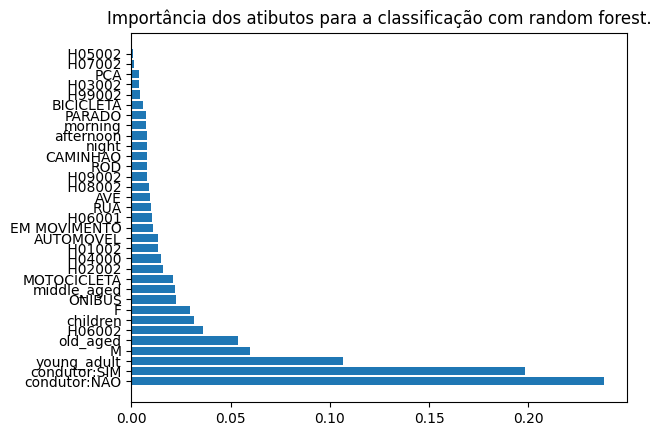

In [11]:
import matplotlib.pyplot as plt
import numpy as np

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [X.columns[i] for i in sorted_idx])
plt.title("Importância dos atibutos para a classificação com random forest.")
plt.show()


## Executando outros algoritmos de classificação
Como a classificação entre fatal e não fatal teve uma acurácia/precisão muito alta (mais de 94%) mesmo após utilizar técnicas de oversampling, vamos classificar os acidentes em não fatais/sem ferimentos , que teve métricas mais razoáveis( maiores que 72%), para comparar outros algoritmos de classificação.

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

LogisticRegression_accuracy = accuracy_score(y_test, y_pred)

# Precision (for multi-class, you may specify the average method)
LogisticRegression_precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Recall (for multi-class, you may specify the average method)
LogisticRegression_recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# F1 score (for multi-class, you may specify the average method)
LogisticRegression_f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print all metrics

print(f"Accuracy: {LogisticRegression_accuracy}")
print(f"Precision: {LogisticRegression_precision}")
print(f"Recall: {LogisticRegression_recall}")
print(f"F1 Score: {LogisticRegression_f1}")

Accuracy: 0.7246115109743381
Precision: 0.7284038094195785
Recall: 0.7246115109743381
F1 Score: 0.7246395714387116


## Confusion Matrix da Regressão Logística

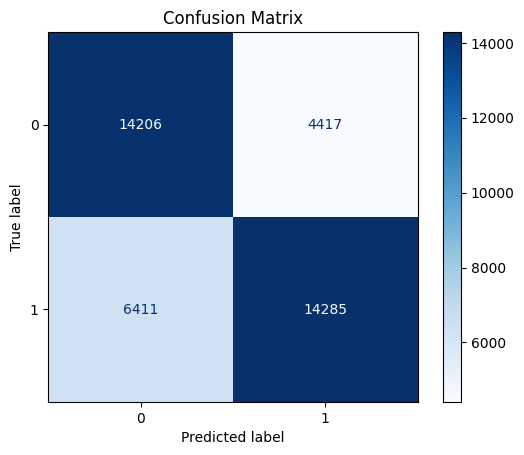

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=np.unique(y_test), cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


## ROC curve  (Receiver Operating Characteristic)

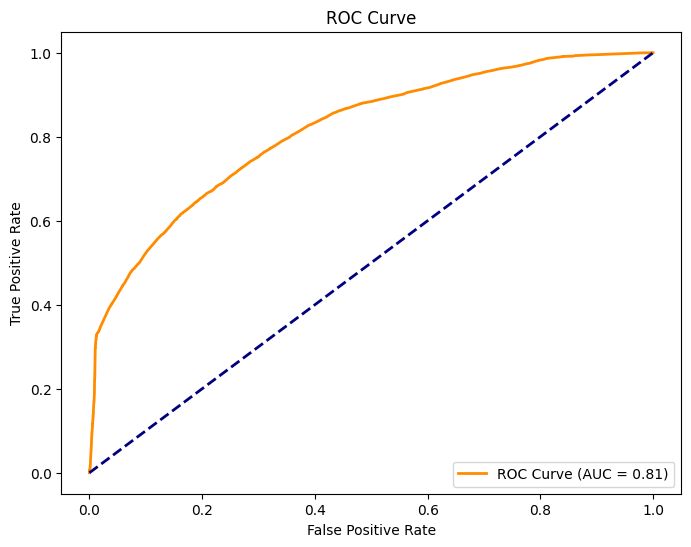

In [23]:
from sklearn.metrics import roc_curve, auc

y_prob = model.predict_proba(X_test)[:, 1] 
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


#### Obsevações sobre a curva ROC
È posível percebe que a curva está sempre acima da diagonal que representa um sistema de classificação aleátorio, assim, essa figura é uma forte evidencia que o modelo funciona de forma adequada.

## Curva de aprendizado

/home/samuel/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


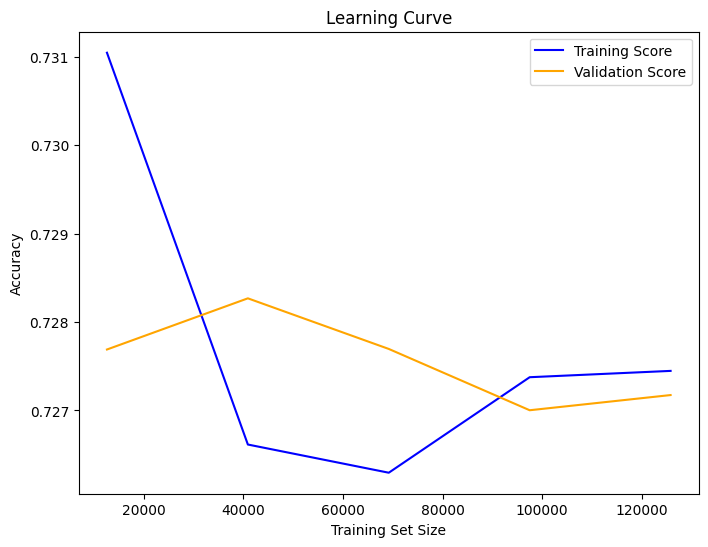

In [24]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy')
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue')
plt.plot(train_sizes, test_mean, label='Validation Score', color='orange')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()


###  Observaçao sobre a curva de aprendizado
Pela figura acima podemos ver que a acuracia aumentou relativamente pouco e até piorou em certa partes mesmo quando os tamanhos do treinamento aumentaram mais de 6x vezes, o que pode implicar que talvez poderia ser melhor se tivessmoes mais informaçoes sobre cada acidente, ou seja o modelo não foi capaz de apender mais com mais dados.

## Decision Tree

In [16]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42,max_depth=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

decision_tree_accuracy = accuracy_score(y_test, y_pred)

# Precision (for multi-class, you may specify the average method)
decision_tree_precision = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Recall (for multi-class, you may specify the average method)
decision_tree_recall = recall_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# F1 score (for multi-class, you may specify the average method)
decision_tree_f1 = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))

# Print all metrics
print(f"Accuracy: {decision_tree_accuracy}")
print(f"Precision: {decision_tree_precision}")
print(f"Recall: {decision_tree_recall}")
print(f"F1 Score: {decision_tree_f1}")

Accuracy: 0.7130649304407538
Precision: 0.7215677664522612
Recall: 0.7130649304407538
F1 Score: 0.7123411025257125


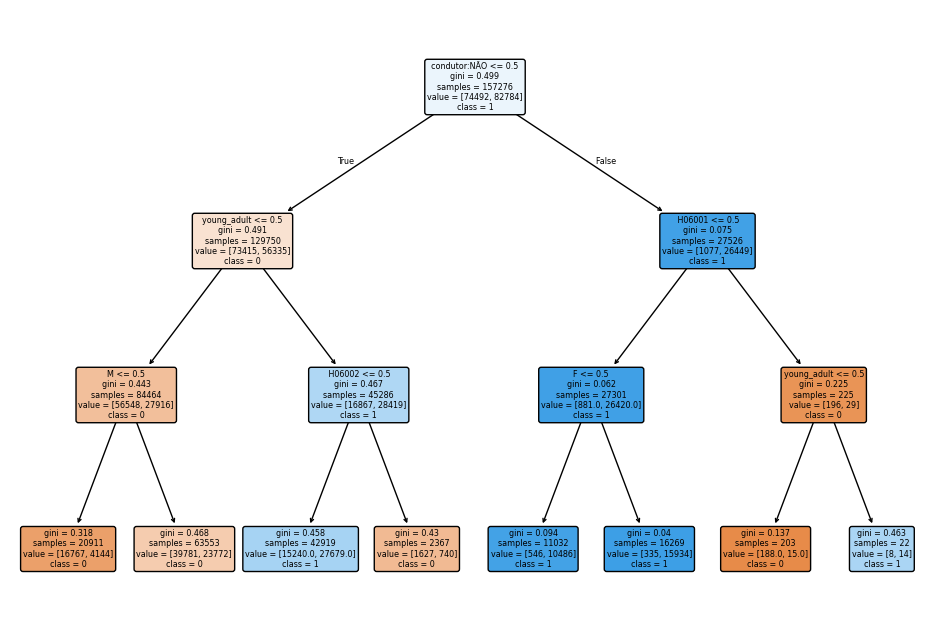

In [17]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X_train.columns, class_names=["0","1"], filled=True, rounded=True)
plt.show()


### Conclusão

A ideia inicial da classificação dos acidentes em fatais/não fatais teve métricas muitos altos, com precisões acima de 95% mesmo quando técnicas de oversampling foram aplicadas para tratar o desbalanceamento das classes para o treinamento dos modelos de classificação. Como as métricas foram muito altas , é possivel que os dados ou a modelagem simplesmente não sejam bons o suficientes para dar certeza a esse tipo de classificação. Assim, foi feita então a classificação em relação a gravidade dos acidentes e essa modelagem teve resultados com maior credibilidade com F1-score de 72% para os modelos de regressão linear, random forest  e uma árvore de decisão. Apesar de todos os modelos terem obtidos métricas similares, é possivel combinar informaçoes adquiridas de cada modelo para ter mais garantias no conhecimento adquirido. Por exemplo, tanto para a árvore de decisão quanto para a regressão linear o fator mais importante foi se o envolvido no acidente era o motorista ou não para a gravidade dos ferimentos.